***Оглавление***

<a href='#part1'>***1. Описание проекта***</a>

<a href='#part2'>***2. Условные обозначения***</a>

<a href='#part3'>***3. Открытие файла и изучение информации***</a>

<a href='#part4'>***4. Подготовка данных***</a>

<a href='#part5'>***5. Анализ данных***</a>

<a href='#part6'>***6. Анализ по регионам***</a>

<a href='#part7'>***7. Проверка гипотез***</a>

<a href='#part8'>***8. Вывод***</a>

<a id='part1'>***1. Описание проекта***</a>

Имеется интернет-магазин «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Необходимо выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

<a id='part2'>***2. Условные обозначения***</a>

Name — название игры

Platform — платформа

Year_of_Release — год выпуска

Genre — жанр игры

NA_sales — продажи в Северной Америке (миллионы проданных копий)

EU_sales — продажи в Европе (миллионы проданных копий)

JP_sales — продажи в Японии (миллионы проданных копий)

Other_sales — продажи в других странах (миллионы проданных копий)

Critic_Score — оценка критиков (максимум 100)

User_Score — оценка пользователей (максимум 10)

Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

<a id='part3'>***3. Открытие файла и изучение информации***</a>

In [1]:
# Загружаем библиотеки и открываем файл
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats as st
import numpy as np
pd.options.display.max_columns=30
pd.options.display.max_columns=100
try:
    df=pd.read_csv('/datasets/games.csv')
except:
    df=pd.read_csv('C:/Users/ASUS/Desktop/практикум/сборный проект1/games.csv')
print(df.info())
display(df.head())    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
None


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


### В таблице названия столбцов начинаются с заглавной буквы. В некоторых столбцах имеются пропуски и даже около 50% пропусков. Возможно пропуски в оценках игр связаны с тем, что оцениваются потенциально популярные (по мнению оценщиков) игры, а не все поголовно. Столбец оценка пользователей имеет тип object, хотя сама оценка имеет только цифровое значение и столбец соответственно должен быть типа float. Скорее всего, кроме цифр там имеются буквенные значения, что позднее придется выяснить. Столбец с годом релиза имеет тип float, переводить его в другой тип не будем, т.к. по сути и такое отображение даты не помешает анализу.

<a id='part4'>***4. Подготовка данных***</a>

In [2]:
# приводим названия столбцов к нижнему регистру
df.columns=df.columns.str.lower()

# создаем столбец с суммарными продажами по всем регионам
df['sum_sales']=df['na_sales']+df['eu_sales']+df['jp_sales']+df['other_sales']
display(df.head())

# Столбец "user_score" имеет тип object, выведем все оригинальные 
# значения в поисках артефактов
print(df['user_score'].value_counts())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


tbd    2424
7.8     324
8       290
8.2     282
8.3     254
       ... 
1.5       2
0.3       2
1.9       2
0         1
9.7       1
Name: user_score, Length: 96, dtype: int64


### Столбец user_score имеет значения "tbd", означающее "будет определено". То есть, по сути, это пропуски. Удалять их нельзя ввиду достаточно большого их количества (14.5% от размера таблицы). Т.к. в дальнейшем производить математические операции со столбцом типа object не получится, заменим "tbd" на "NaN" и переведем столбец в тип данных float. 

In [3]:
# меняем 'tbd' на NaN 
def tbd_to_nan(row):
    if row['user_score']=='tbd':
        return 'NaN'
    else: return row['user_score']
df['user_score']=df.apply(tbd_to_nan, axis=1)

# переводим столбец в тип  float
df['user_score']=df['user_score'].astype('float')

### В ходе предобработки данных привели названия столбцов к нижнему регистру, заменили 'tbd' на "NaN" в столбце 'user_score' и перевели его в тип данных float для дальнейших вычислений. Даты переводить в тип datatime не стали, т.к. датой пользоваться особенно и не будем.

<a id='part5'>***5. Анализ данных***</a>

In [4]:
# группируем данные по годам
year_grouped=df.groupby('year_of_release')['name'].count()
print(year_grouped)

year_of_release
1980.0       9
1981.0      46
1982.0      36
1983.0      17
1984.0      14
1985.0      14
1986.0      21
1987.0      16
1988.0      15
1989.0      17
1990.0      16
1991.0      41
1992.0      43
1993.0      60
1994.0     121
1995.0     219
1996.0     263
1997.0     289
1998.0     379
1999.0     338
2000.0     350
2001.0     482
2002.0     829
2003.0     775
2004.0     762
2005.0     939
2006.0    1006
2007.0    1197
2008.0    1427
2009.0    1426
2010.0    1255
2011.0    1136
2012.0     653
2013.0     544
2014.0     581
2015.0     606
2016.0     502
Name: name, dtype: int64


### Хотя у нас и имеются данные за 36 лет, полагаю, что можно обойтись данными не ранее 2000г., т.к. за эти 2 периода сильно изменились как технологии, так и сами люди и общество; сильно отличаются друг от друга и платформы и игры. Возможно даже использовать данные и за последние 10 лет, но, на всякий случай, и для более точного анализа будем оперировать данными с 2000 года.

,platform,sum_sales
0,PS2,1194.39
1,X360,961.24
2,PS3,931.34
3,Wii,891.18
4,DS,802.76
5,PS4,314.14
6,GBA,312.81
7,PSP,289.53
8,3DS,257.81
9,XB,250.58





Платформа: PS2


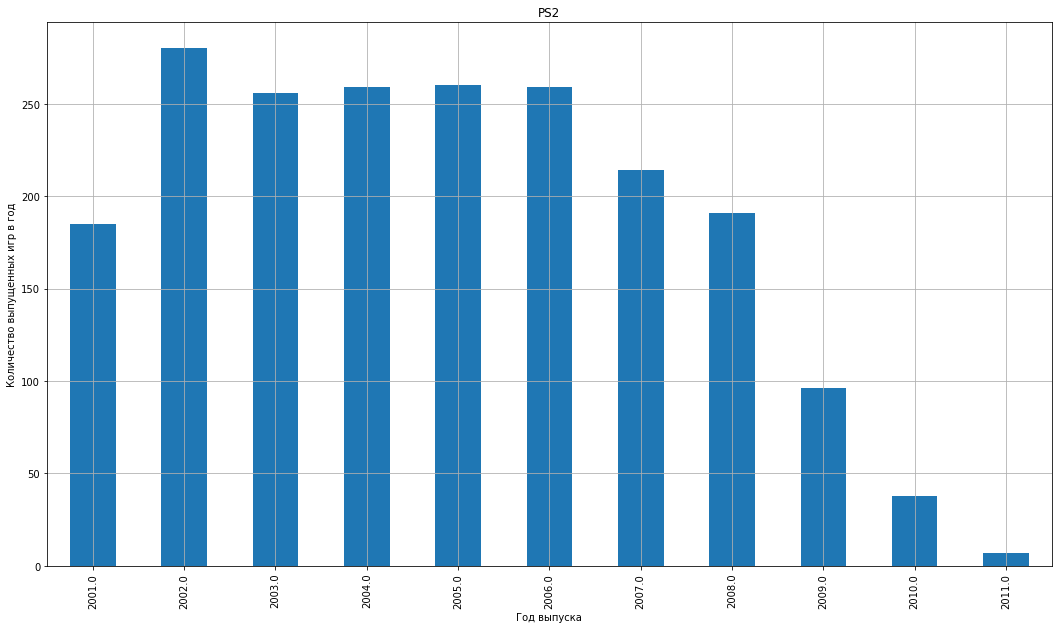




Платформа: X360


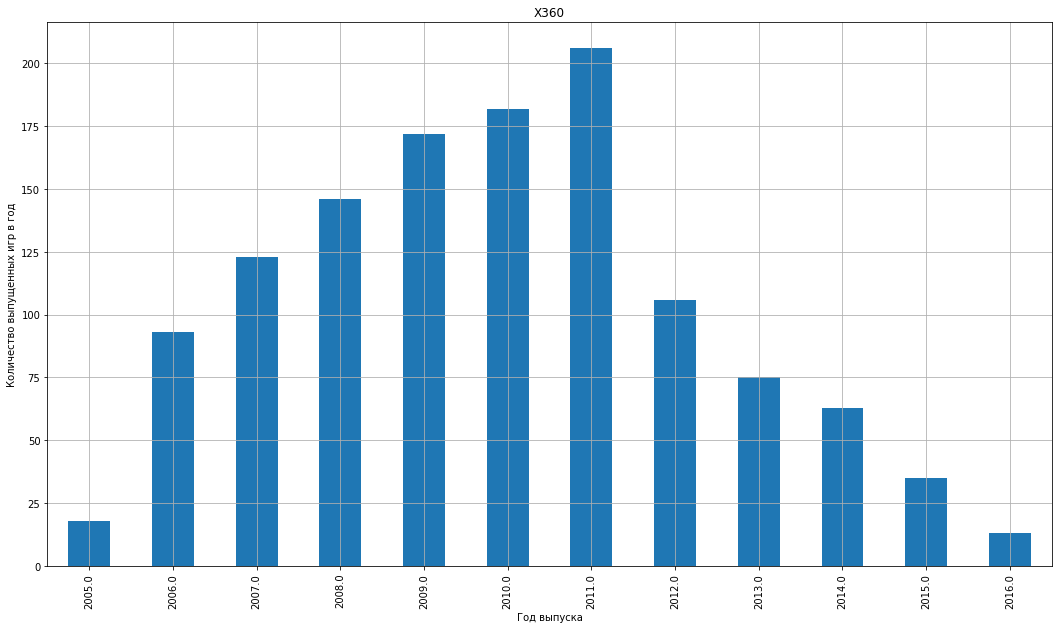




Платформа: PS3


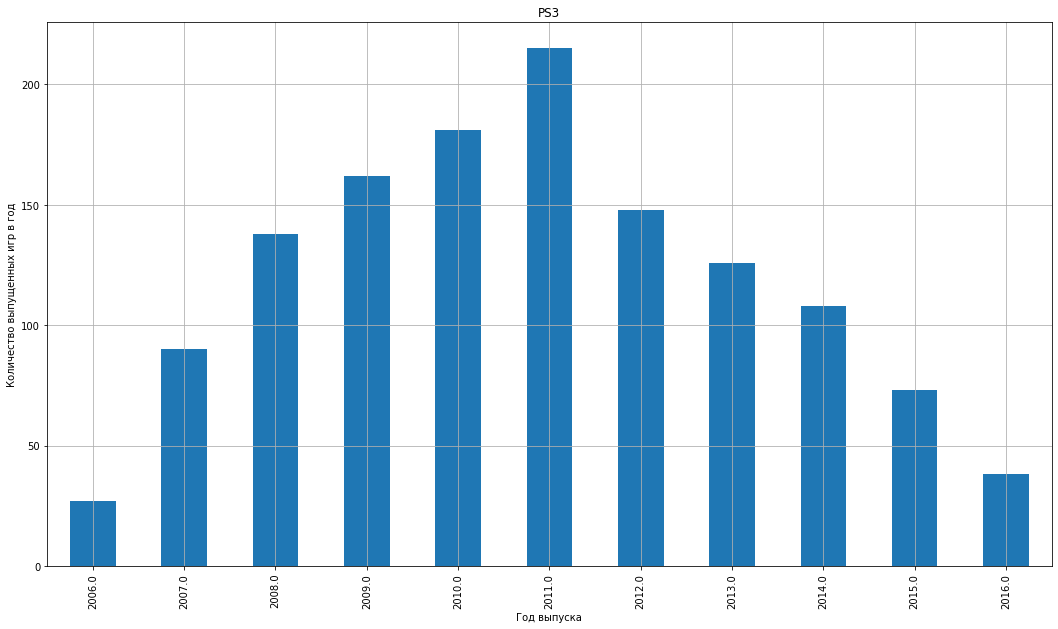




Платформа: Wii


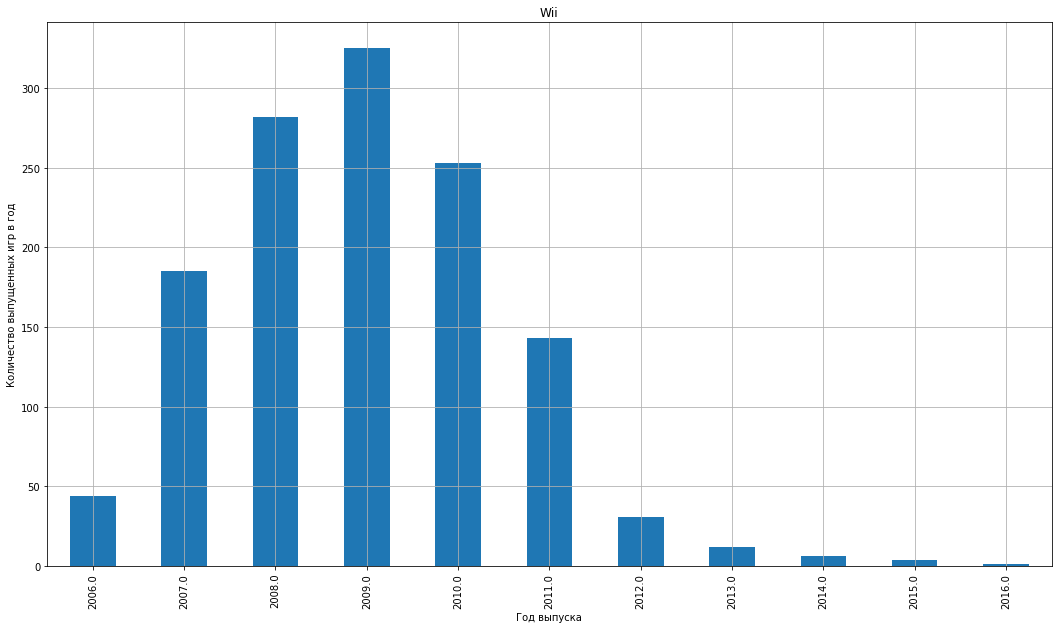




Платформа: DS


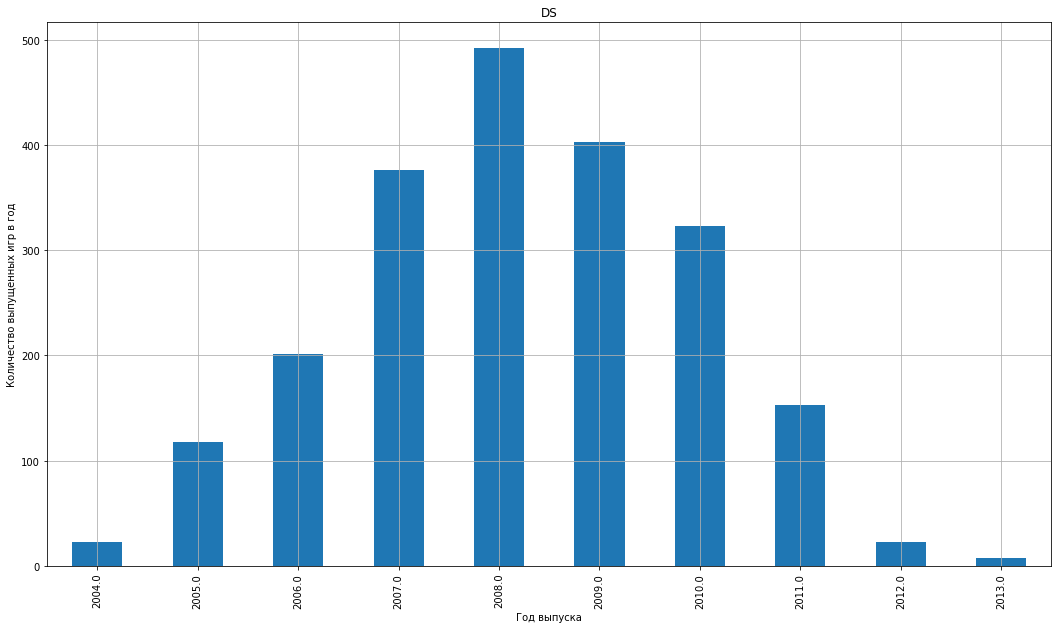

In [5]:
# обрезаем таблицу по годам начиная с 2001 года
df=df[df['year_of_release']>2000]

# сгруппируем данные и отсортируем платформы по продаваемости
platform_sales_grouped=(df.pivot_table(index=['platform'], values='sum_sales', 
                aggfunc='sum').sort_values(by='sum_sales', ascending=False))
platform_sales_grouped=platform_sales_grouped.reset_index()
display(platform_sales_grouped)
print('\n\n')

# построим распределение по годам для 5 самых популярных платформ
for platform in platform_sales_grouped['platform'].head():
    print('Платформа:', platform)
    platform_year_grouped=(df[df['platform']==platform]
                          .groupby('year_of_release')['name'].agg('count'))
    (platform_year_grouped.plot(kind='bar', y='name', figsize=(18, 10),
                                           grid=True, title=platform))
    plt.xlabel('Год выпуска')
    plt.ylabel('Количество выпущенных игр в год')
    plt.show()
    print('\n\n')

###  Из 5 рассмотренных платформ 4 имеют нормальное распределение. Платформа PS2 возможно тоже имеет нормальное распределение, если бы мы не обрезали  данные. Время, за которое появляются новые и исчезают старые платформы сильно разнится, однако полагаю, что для большинства из них этот срок будет лежать в диапазоне 5-10 лет. На следующем шаге проанализируем платформы за последние 5 лет.

,platform,sum_sales
0,PS4,314.14
1,PS3,288.79
2,X360,236.54
3,3DS,194.61
4,XOne,159.32
5,WiiU,82.19
6,PC,62.65
7,PSV,49.18
8,Wii,35.37
9,DS,12.55


Платформа: PS4


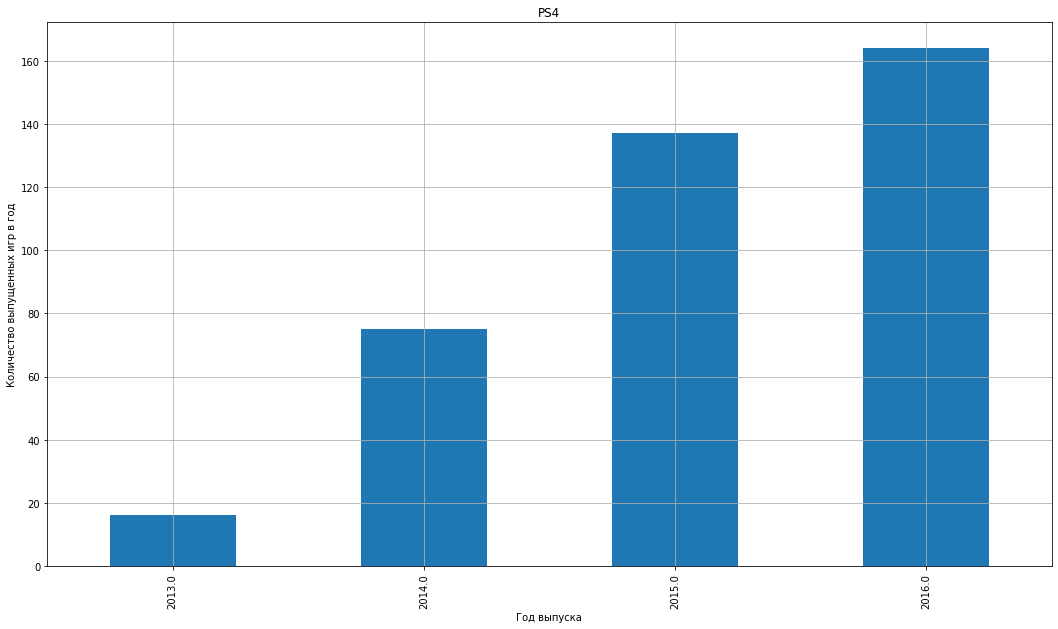




Платформа: PS3


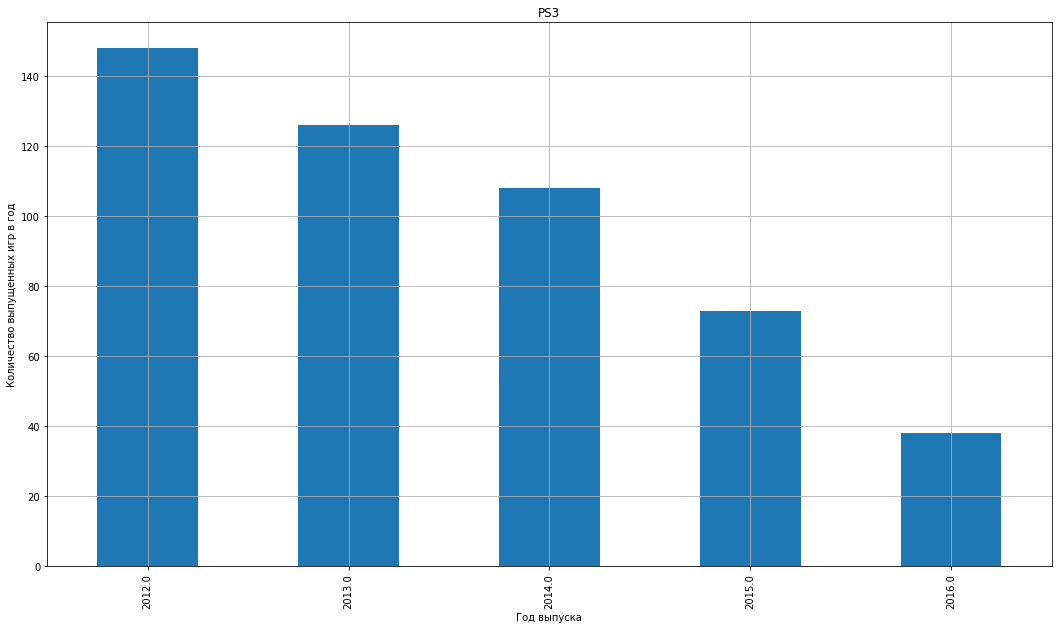




Платформа: X360


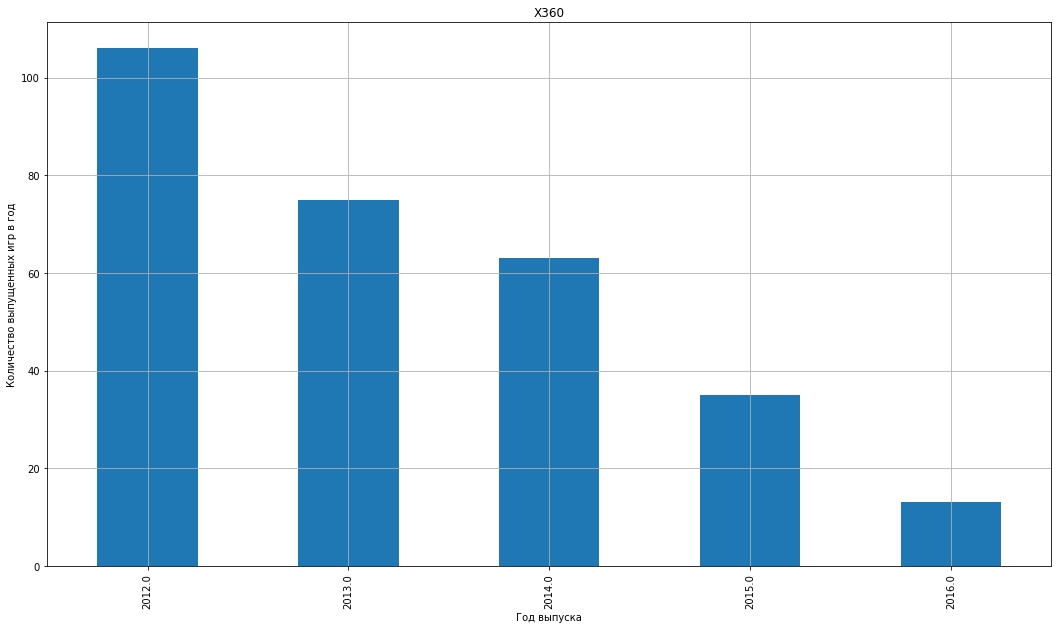




Платформа: 3DS


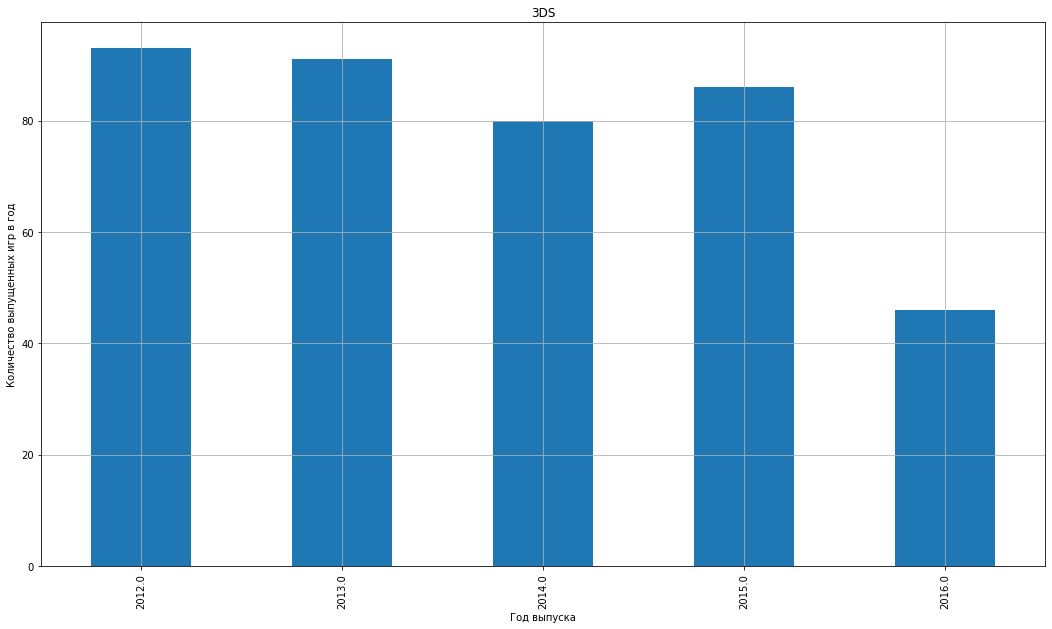




Платформа: XOne


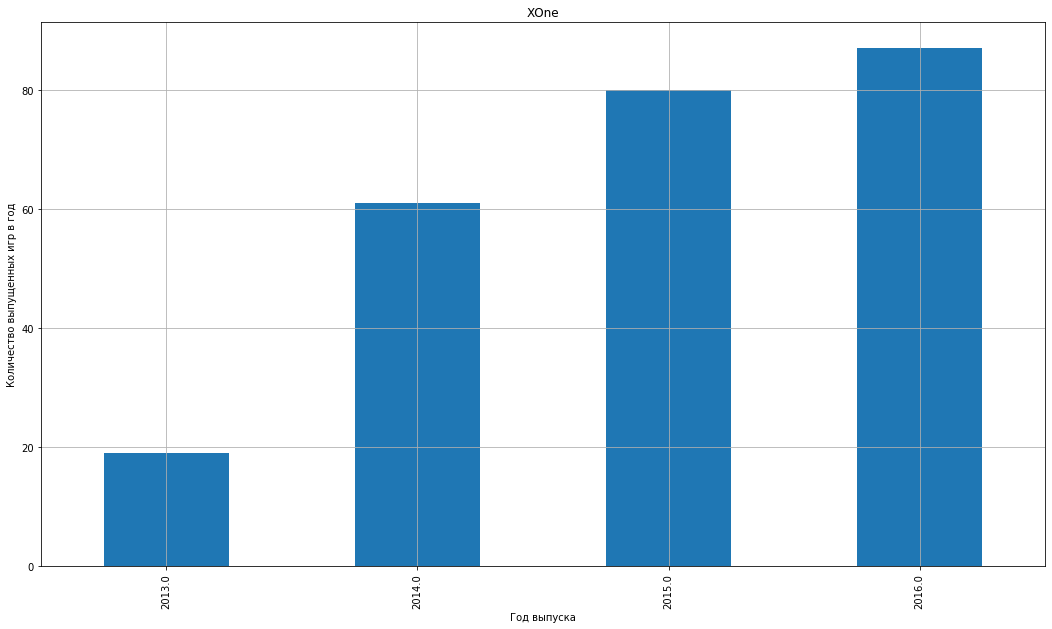




Платформа: WiiU


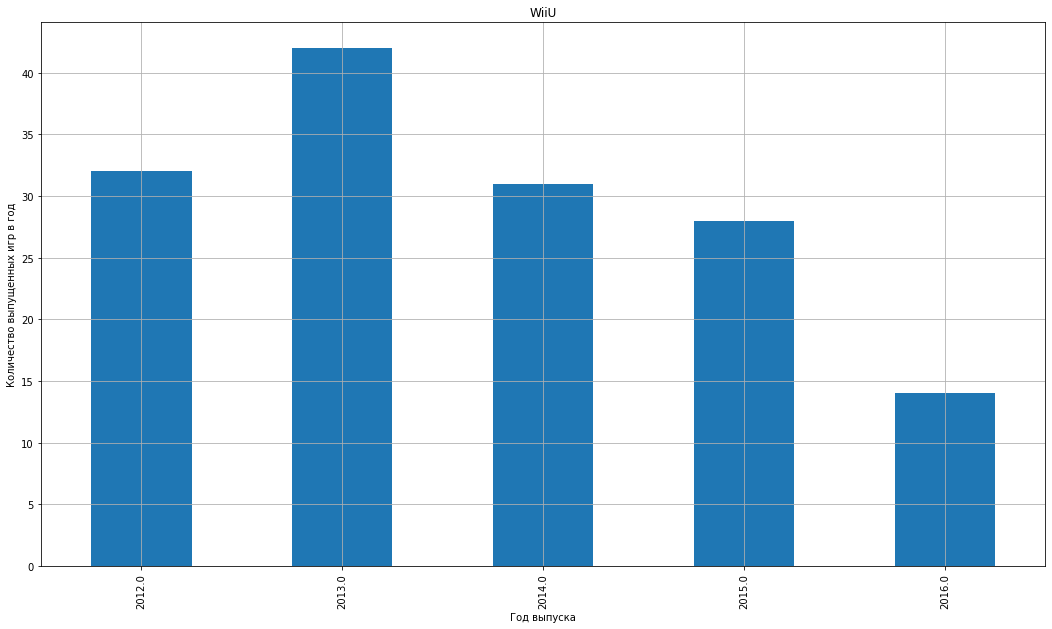




Платформа: PC


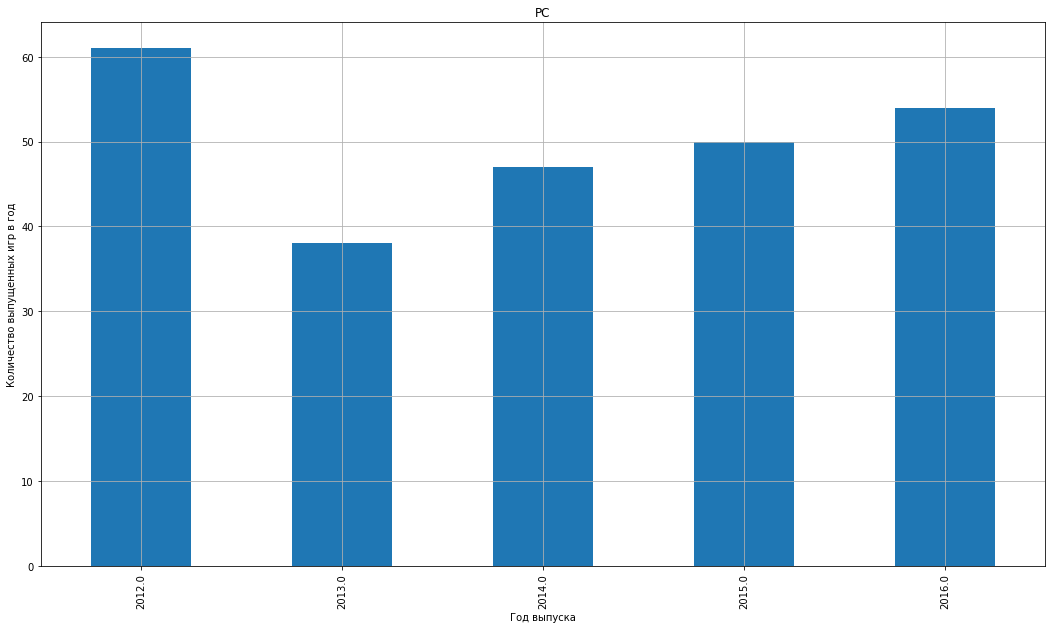




Платформа: PSV


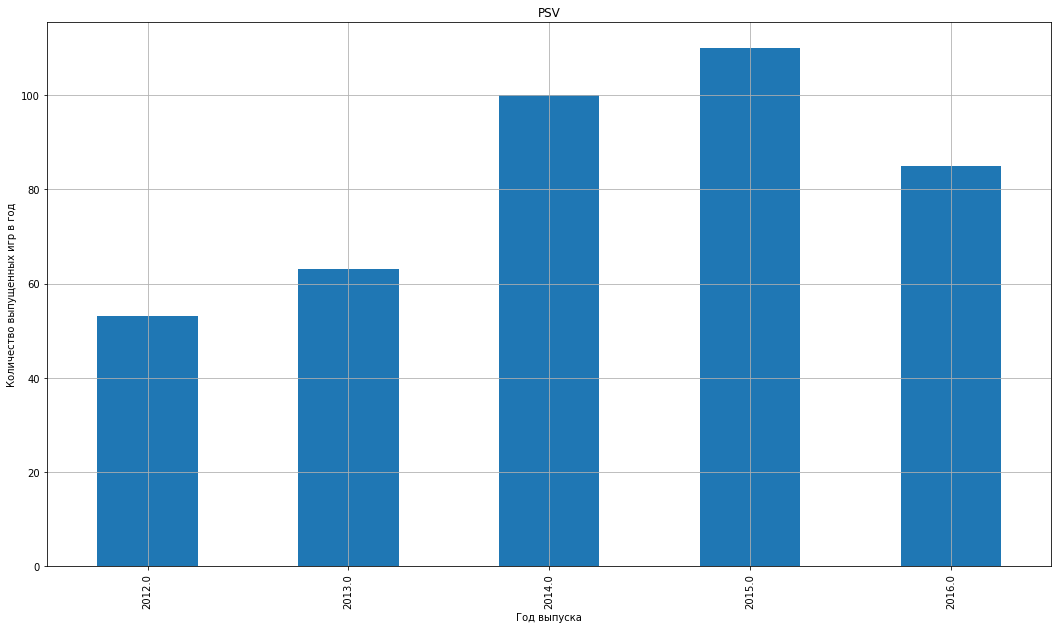




Платформа: Wii


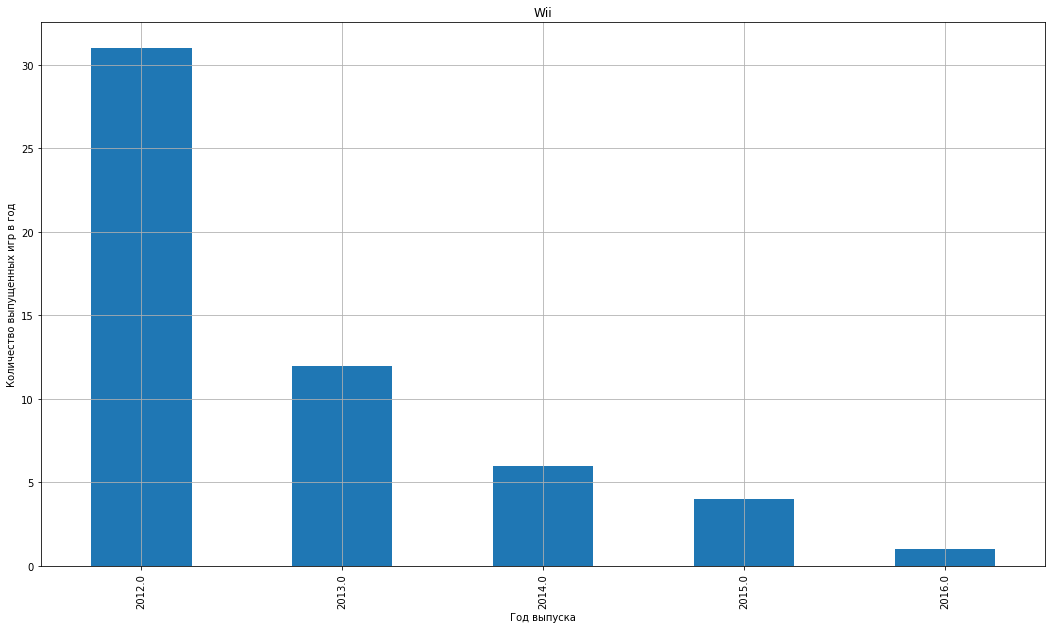




Платформа: DS


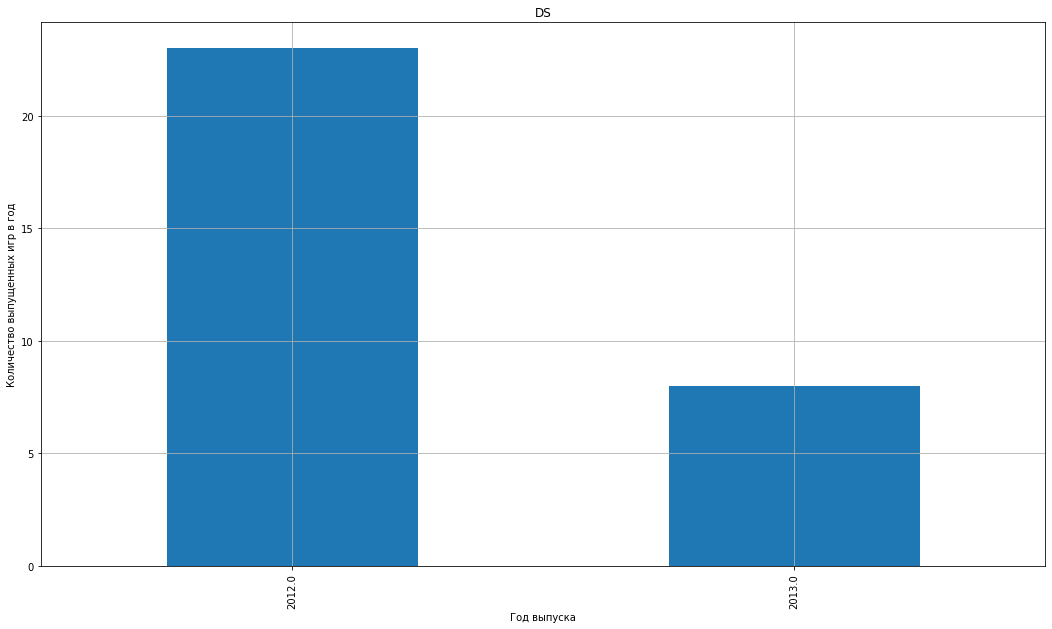

In [6]:
# опять обрежем таблицу по годам, начиная с 2011
df=df[df['year_of_release']>2011]

# выведем сымые продаваемые платформы
platform_sales_grouped=(df.pivot_table(index=['platform'], values='sum_sales', 
                aggfunc='sum').sort_values(by='sum_sales', ascending=False))

platform_sales_grouped=platform_sales_grouped.reset_index()
display(platform_sales_grouped)

# построим распределение по годам для первых 10 платформ
for platform in platform_sales_grouped['platform'].head(10):
    print('Платформа:', platform)
    platform_year_grouped=(df[df['platform']==platform]
                            .groupby('year_of_release')['name'].agg('count'))
    (platform_year_grouped.plot(kind='bar', y='name', figsize=(18, 10),
                                    grid=True, title=platform))
    plt.xlabel('Год выпуска')
    plt.ylabel('Количество выпущенных игр в год')
    plt.show()
    print('\n\n')

### Самыми перспективными платформами являются: PS4 и XOne, т.к. они находятся на стадии роста и их ежегодные продажи растут, тогда как другие находятся на стадии снижения или плато.

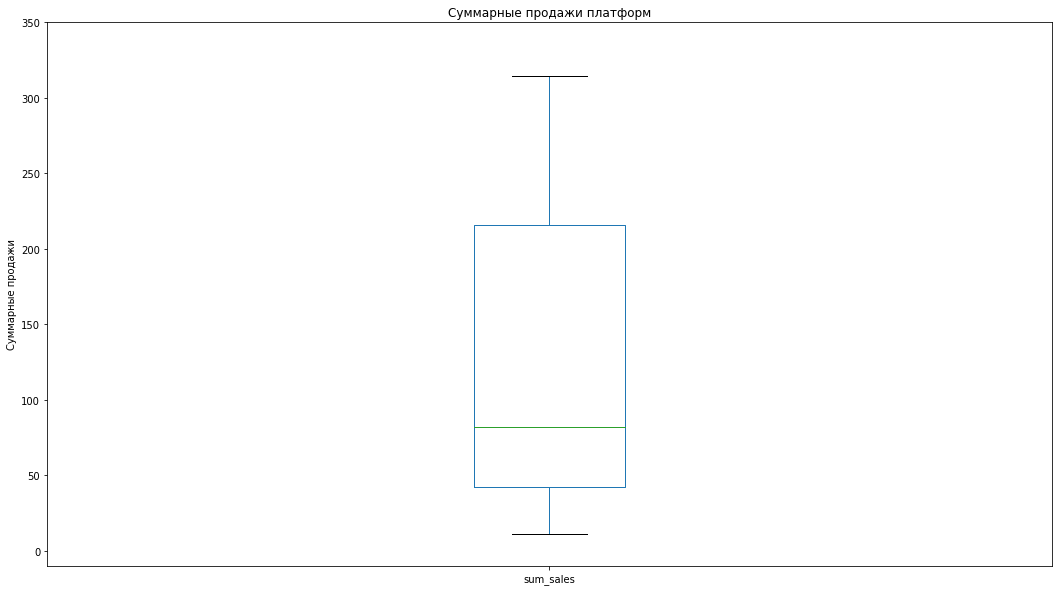

In [7]:
# построим "ящик с усами" по продажам для платформ
platform_sales_grouped['sum_sales'].plot.box(figsize=(18, 10), title='Суммарные продажи платформ')
plt.ylabel('Суммарные продажи')
plt.ylim(-10, 350)
plt.show()

### Медиана продаж по платформам лежит около 75, а половина всех продаж находится в диапазоне 50-220. Всё, что выше 320 можно считать выбросами. Платформа XOne как раз находится внутри ящика и, учитывая ее стадию роста, это, возможно, хороший выбор для бизнеса, тогда как платформа PS4 уже подошла к верхней границе, за которой начинаются выбросы.

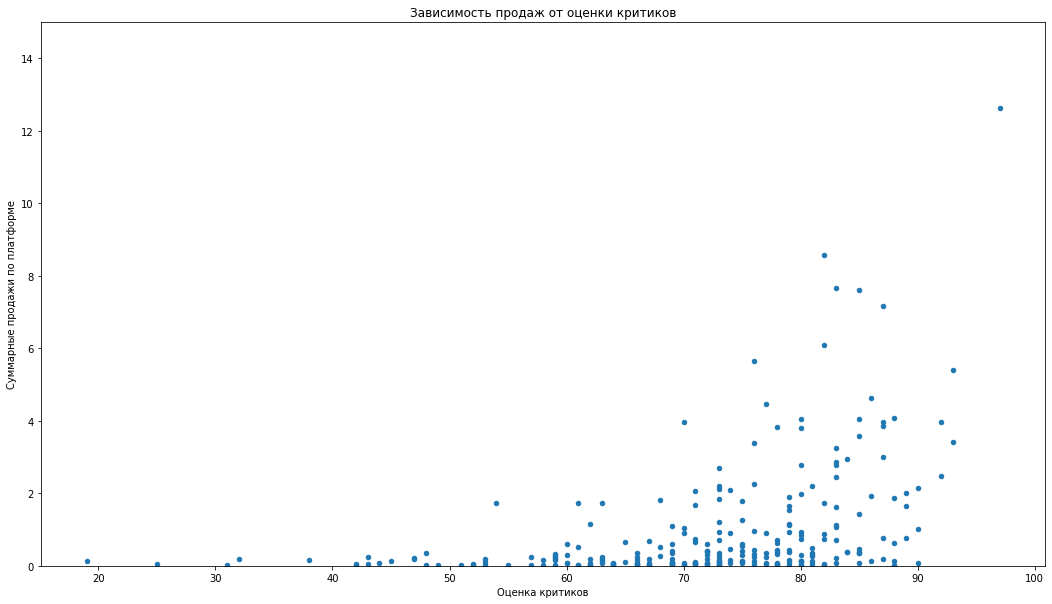

0.40656790206178095


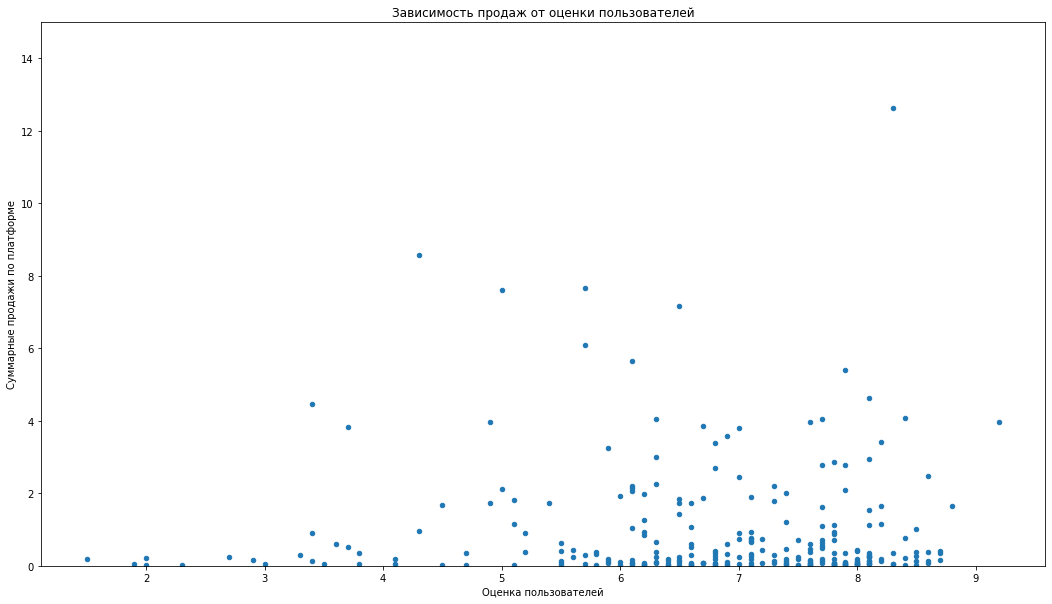

-0.031957110204556424


In [8]:
# выведем данные по наиболее популярной платформе
top_platform=df[df['platform']=='PS4']

# построим диаграмму рассеяния для оценки критиков и продаж
(top_platform.plot(x='critic_score', y='sum_sales', kind='scatter', 
        title='Зависимость продаж от оценки критиков', figsize=(18, 10)))
plt.ylim(0, 15)
plt.xlabel('Оценка критиков')
plt.ylabel('Суммарные продажи по платформе')
plt.show()

# рассчитаем корреляцию между оценками и продажами
print(top_platform['critic_score'].corr(top_platform['sum_sales']))



# построим диаграмму рассеяния для оценки пользователей и продаж
(top_platform.plot(x='user_score', y='sum_sales', kind='scatter', 
    title='Зависимость продаж от оценки пользователей', figsize=(18, 10)))
plt.ylim(0, 15)
plt.xlabel('Оценка пользователей')
plt.ylabel('Суммарные продажи по платформе')
plt.show()

# рассчитаем корреляцию между оценками и продажами
print(top_platform['user_score'].corr(top_platform['sum_sales']))

### Корреляция между оценками как критиков так и пользователей и продажами низкая, хотя отдельные выбросы и имеются. Однако эти выбросы не делают погоды для продаж.

In [9]:
# сгруппируем данные по жанрам и найдем самые популярные 
df_genre=df.groupby('genre')['sum_sales'].agg('sum').sort_values(ascending=False)
display(df_genre)

genre
Action          441.12
Shooter         304.73
Role-Playing    192.80
Sports          181.07
Misc             85.04
Platform         61.00
Racing           53.50
Fighting         44.49
Simulation       35.12
Adventure        29.43
Strategy         13.34
Puzzle            4.89
Name: sum_sales, dtype: float64

### Безусловным лидером является жанр Action. В целом, самыми популярными жанрами оказались жанры, в которых от игрока требуется максимально активное участие, такие как стрелялки, спортивные игры и т.д. Игры, где требуется усидчивость, вдумчивость, можно сказать, являются играми для избранных любителей. 

<a id='part6'>***6. Анализ по регионам***</a>

In [18]:
# найдем самые популярные жанры и платформы в каждом регионе продаж, а также
# определим зависимость продаж от рейтинга ESRB в каждом регионе
for column in df[['na_sales', 'eu_sales', 'jp_sales']]:
    display(df.groupby('platform')[column].agg('sum').sort_values(ascending=False).head(5))
    print()
    display(df.groupby('genre')[column].agg('sum').sort_values(ascending=False).head(5))
    print()
    display(df.groupby('rating')[column].agg('sum').sort_values(ascending=False).head(5))
    print('\n\n\n')
    

platform
X360    140.05
PS4     108.74
PS3     103.38
XOne     93.12
3DS      55.31
Name: na_sales, dtype: float64

genre
Action          177.84
Shooter         144.77
Sports           81.53
Role-Playing     64.00
Misc             38.19
Name: na_sales, dtype: float64

rating
M       231.57
E       114.37
E10+     75.70
T        66.02
Name: na_sales, dtype: float64

platform
PS4     141.09
PS3     106.86
X360     74.52
XOne     51.59
3DS      42.64
Name: eu_sales, dtype: float64

genre
Action          159.34
Shooter         113.47
Sports           69.09
Role-Playing     48.53
Racing           27.29
Name: eu_sales, dtype: float64

rating
M       193.96
E       113.03
E10+     55.37
T        52.96
Name: eu_sales, dtype: float64

platform
3DS     87.79
PS3     35.29
PSV     21.04
PS4     15.96
WiiU    13.01
Name: jp_sales, dtype: float64

genre
Role-Playing    65.44
Action          52.80
Misc            12.86
Simulation      10.41
Fighting         9.44
Name: jp_sales, dtype: float64

rating
E       28.33
T       26.02
M       21.20
E10+     8.19
Name: jp_sales, dtype: float64

### В Америке и Европе самые популярные платформы абсолютно идентичны, лишь по объемам продаж X360 в Америке находится на 1 месте, тогда как в Европе на 3. Япония же коренным образом отличается от них. Здесь появляются 2 новых платформы PSV и WIIU. По продажам разница между регионами не столь ощутима: в Америке и в Европе на топ-2 платформах продается практически одинаковое количество игр и в 1.5 раза больше чем в Японии. Отличие Японии от Америки с Европой можно объяснить разностью менталитета и объемом рынка. 
### С жанрами наблюдается точно такая же картина по регионам: практически идентичные жанры в Европе и Америке(самый популярный и там и там Action), за исключением жанра Racing в Европе и 2 новых жанра в Японии, причем Action на 2 месте. По объемам продаж жанры в Америке и в Европе отличаются друг от друга не более чем на 20% для топ1 и на 10% для топ2, в Японии примерно в 2 раза меньше, чем в Европе и в 3 раза меньше, чем в Америке.
### Что касается рейтинга, то в Америке и Европе самым "продаваемым" рейтингом от ESRB является М. В Японии, похоже этот рейтинг не имеет вообще никакого отношения к продажам, т.к. здесь самый "продаваемый" рейтинг в 8 раз меньше, чем в Америке.

<a id='part7'>***7. Проверка гипотез***</a> 

### Сформулируем нулевую гипотезу: средние пользовательские рейтинги платформ Xbox One и PC равны. Альтернативная гипотеза - пользовательские рейтинги не равны. За уровень значимости примем 5%. Т.е. если вероятность события будет меньше 5%, значит есть все основания отвергнуть нулевую гипотезу и мы принимаем альтернативную гипотезу, если же больше 5% оснований отвергнуть нулевую гипотезу нет . Перед проверкой гипотез сравним дисперсию 2 выборок (платформ) и учтем это в нашем расчете: если дисперсии отличаются более чем на 5%, считаем различия в выборках значимыми.

In [11]:
# строим таблицы с 2 платформами и сравниваем дисперсии
df_xbox_one=df[(df['platform']=='XOne') & (df['user_score']>0)]
df_pc=df[(df['platform']=='PC') & (df['user_score']>0)]
print(df_xbox_one['user_score'].var()/df_pc['user_score'].var()*100)

68.83361818149125


In [12]:
# различия по выборкам принимаем значимыми - equal_var=False
alpha=0.05
results = st.ttest_ind(df_xbox_one['user_score'], df_pc['user_score'], equal_var=False)

print('p-значение: ', results.pvalue)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  0.5489537965134912
Не получилось отвергнуть нулевую гипотезу


### Вывод: средние рейтинги пользователей платформ Xbox One и PC одинаковы.

### Есть предположение, что средние пользовательские оценки жанров Action и Sports отличаются друг от друга. Для проверки этого предположения сформулируем нулевую гипотезу: средние пользовательские рейтинги жанров Action и Sports равны. Альтернативная гипотеза - пользовательские рейтинги не равны. За уровень значимости примем 5%. Т.е. если вероятность события будет меньше 5%, значит есть все основания отвергнуть нулевую гипотезу и мы принимаем альтернативную гипотезу, если же больше 5% оснований отвергнуть нулевую гипотезу нет . Перед проверкой гипотез сравним дисперсию 2 выборок (платформ) и учтем это в нашем расчете: если дисперсии отличаются более чем на 5%, считаем различия в выборках значимыми.¶

In [13]:
df_action=df[(df['genre']=='Action') & (df['user_score']>0)]
df_sports=df[(df['genre']=='Sports') & (df['user_score']>0)]
print(df_sports['user_score'].var()/df_action['user_score'].var()*100)

160.0188355626178


In [14]:
# различия по выборкам принимаем значимыми - equal_var=False
alpha=0.05
results = st.ttest_ind(df_action['user_score'], df_sports['user_score'], equal_var=False)

print('p-значение: ', results.pvalue)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  4.24307776572644e-20
Отвергаем нулевую гипотезу


### Вывод: средние пользовательские оценки жанров Action и Sports различны, что подтверждает наше предположение.

<a id='part8'>***8. Вывод***</a> 

### В ходе проведенного исследования удалось выяснить, что самым популярным жанром игр является Action. Наиболее перспективной платформой: XOne. Также бизнесу не стоит особо много обращать внимание на пользовательские рейтинги критиков, а вот игры с рейтингом М от ESRB продаются лучше всего. Наибольшие перспективы продаж игр будут на американском и европейском рынке.